# 6.2 AQI Exploring Relationships 

#This Script contains the following:

#1. Importing Visualization Libraries and Data

#2. Data Cleaning

#3. Exploring Relationships

 a. Correlations
 
 b. Scatterplots
 
 c. Pair Plots
 
 d. Categorical Plots

# 1. Importing Visualization Libraries and Data

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [29]:
matplotlib.__version__

'3.7.0'

In [30]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [31]:
#Reading the dataset into object 'df' using pandas:
path=r'C:\Users\User01\Analysing India Air Quality Data'
df_city= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'city_checked.csv'), index_col = False)
df_stations= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stations_checked.csv'), index_col = False)

# 2. Data Cleaning

In [32]:
df_city.shape

(1005, 12)

In [33]:
df_city.columns

Index(['State', 'City', 'year', 'month', 'PM', 'Nitric', 'CO', 'NH3', 'O3',
       'SO2', 'BTX', 'AQI'],
      dtype='object')

In [34]:
# Rename columns in consistent format
df_city.rename(columns = {'year' : 'Year', 'month': 'Month'}, inplace = True)

In [35]:
df_city.dtypes

State      object
City       object
Year        int64
Month       int64
PM        float64
Nitric    float64
CO        float64
NH3       float64
O3        float64
SO2       float64
BTX       float64
AQI       float64
dtype: object

In [36]:
df_stations.shape

(108035, 21)

In [37]:
df_stations.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI',
       'AQI_Bucket', 'StationName', 'City', 'State', 'Status'],
      dtype='object')

In [38]:
df_stations.drop(df_stations.columns[0], axis=1, inplace=True)

In [39]:
df_stations.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,11/24/2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,0,Not Provided,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,11/25/2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,11/26/2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,11/27/2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,11/28/2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


# 3. Exploring Relationships

Here are some potential data analysis questions that can be explored using AQI index data:
1. What is the overall trend of air quality over a specific time period?
2. Are there any seasonal patterns in air quality? Does air quality vary throughout the year?
3. Which pollutants contribute most significantly to poor air quality in a particular region?
4. Are there any geographical patterns in air quality? Are certain areas consistently experiencing better or worse air quality?
5. Are there any significant changes in air quality over the years? Has air quality improved or worsened?
7. How does air quality compare across different cities or regions within a country?

# a. Correlation

In [40]:
df_city.corr()

C:\Users\User01\AppData\Local\Temp\ipykernel_7232\3469591908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_city.corr()


,Year,Month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
Year,1.000000,-0.193656,0.098246,0.030792,-0.076262,0.014867,0.081678,0.095782,0.078707,-0.052094
Month,-0.193656,1.000000,-0.000850,0.015954,-0.004940,-0.000759,-0.084334,-0.031078,0.007100,0.020508
PM,0.098246,-0.000850,1.000000,0.626912,-0.001708,0.273868,0.414142,0.194107,0.170518,0.589689
Nitric,0.030792,0.015954,0.626912,1.000000,0.351381,0.205231,0.336590,0.398588,0.297628,0.660347
CO,-0.076262,-0.004940,-0.001708,0.351381,1.000000,-0.107090,0.112073,0.658116,0.342239,0.672568
NH3,0.014867,-0.000759,0.273868,0.205231,-0.107090,1.000000,0.184410,-0.089157,0.016164,0.088668
O3,0.081678,-0.084334,0.414142,0.336590,0.112073,0.184410,1.000000,0.298710,0.207562,0.404758
SO2,0.095782,-0.031078,0.194107,0.398588,0.658116,-0.089157,0.298710,1.000000,0.339907,0.591202
BTX,0.078707,0.007100,0.170518,0.297628,0.342239,0.016164,0.207562,0.339907,1.000000,0.348172
AQI,-0.052094,0.020508,0.589689,0.660347,0.672568,0.088668,0.404758,0.591202,0.348172,1.000000


In [41]:
# Create a subset excluding the "Date" and "No" columns
sub = df_city[['PM', 'Nitric', 'CO','NH3', 'O3','SO2', 'BTX', 'AQI']]

Text(0.5, 1.0, 'Correlation Matrix')

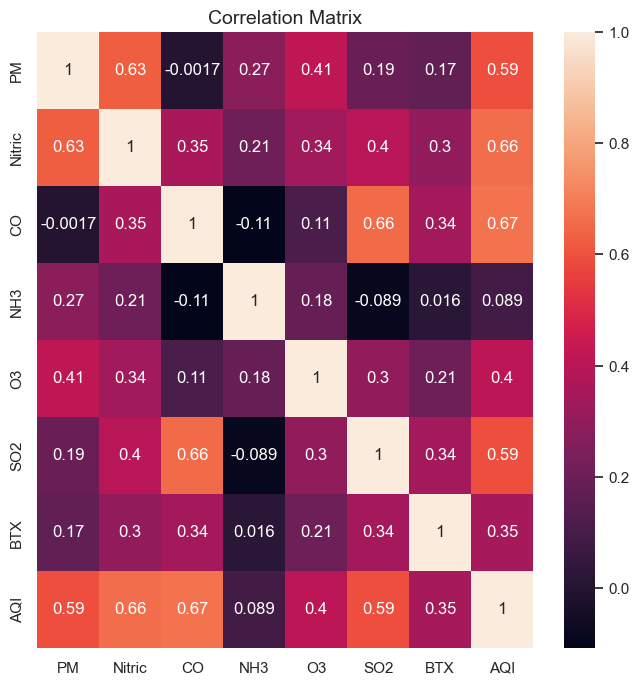

In [42]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
plt.title('Correlation Matrix', fontsize=14)

# We see that BTX has the lowest correlation with AQI- which is perfectly in sync with the AQI calculation formula. The air quality index is composed of 8 pollutants ((PM10, PM2.5, NO2, SO2, CO, O3, and NH3), but does not directly account for BTX.

In [43]:
# Exporting Heatmap
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Correlation Matrix.png'))

# Visualizing the most polluted cities for each category of pollutants (2017-19)
Lets take a look at Top 10 most populated cities before Covid i.e (2020).

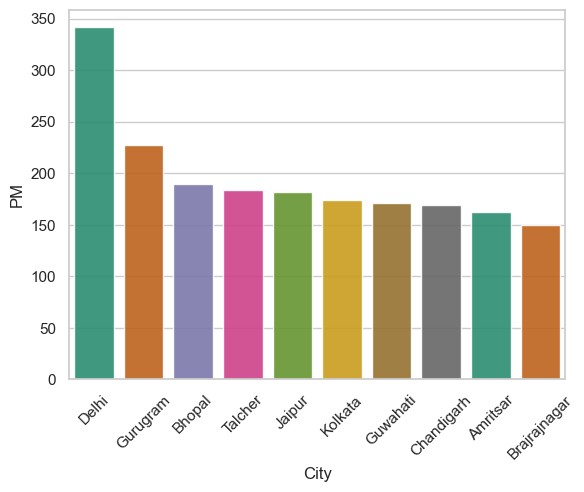

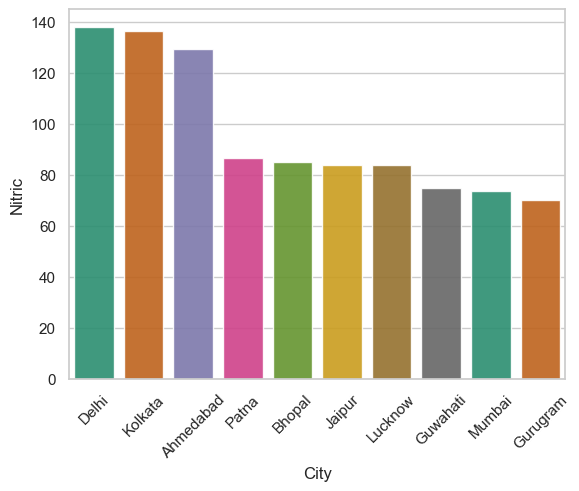

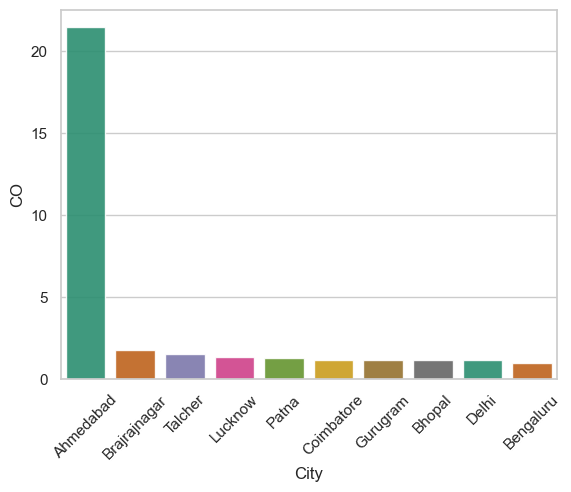

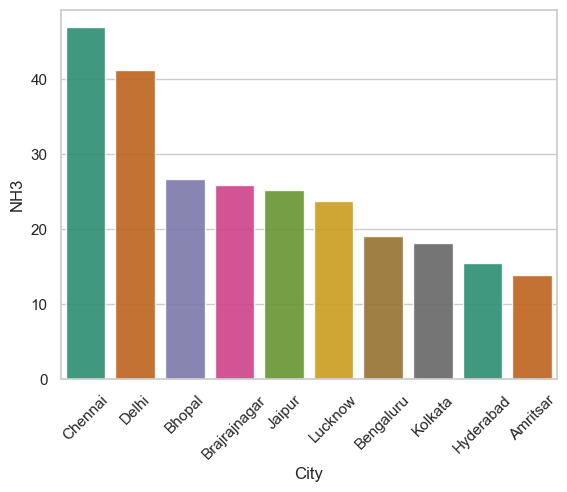

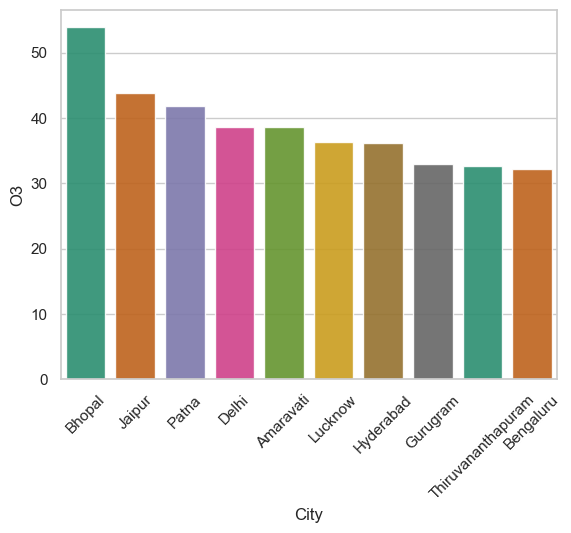

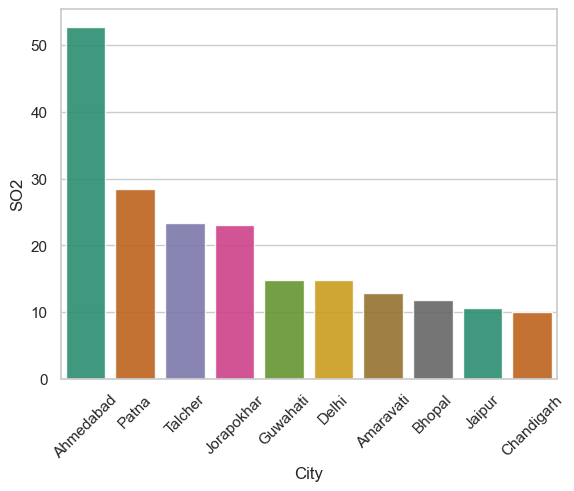

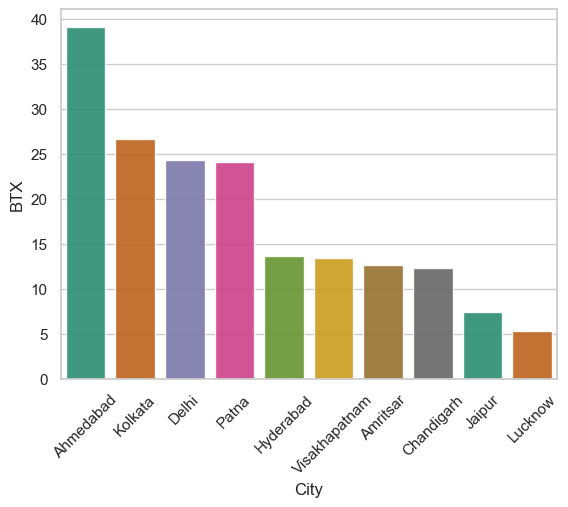

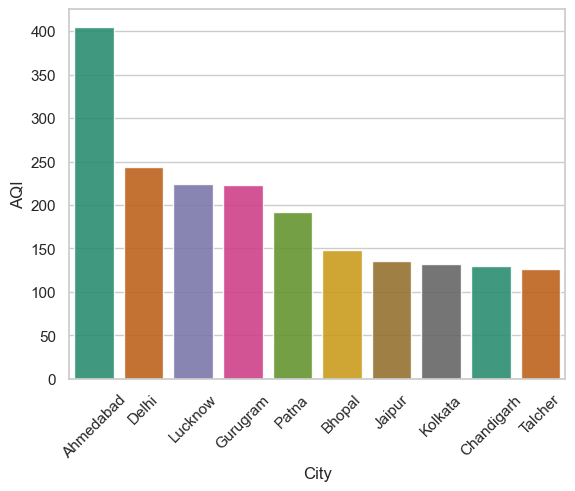

In [44]:
#taking a subset of our dataset for the last three years before 2020
cities_17_19=df_city[df_city['Year'].isin([2017,2018,2019])]

#list of pollutants
pollutants=['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']
sns.set_theme(style='whitegrid')

#plotting the top 10 most polluted cities for each category of pollutants, as well as overall AQI
for i in pollutants:
    df=cities_17_19.groupby(['City'])[[i]].mean().sort_values(i,ascending=False).iloc[:10,:]
    
    df=df.reset_index(['City'])

    plt.figure()
    sns.barplot(data=df, x="City", y=i, palette="Dark2", alpha=.9)
    plt.xticks(rotation=45) 


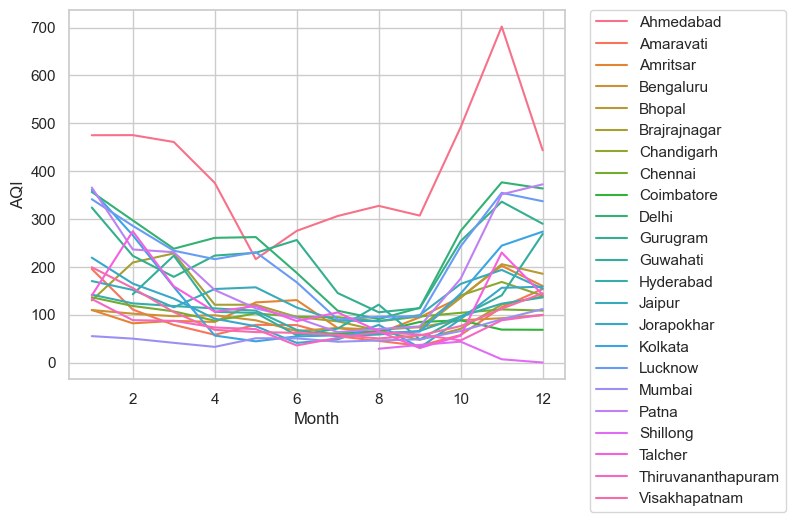

In [45]:
# AQI trend for the period (2017-2019)
df_AQI_trend= cities_17_19.groupby(['City','Month'])[['AQI']].mean().reset_index()

AQI_Trend=sns.lineplot(
    data=df_AQI_trend,
    x="Month", y="AQI",hue='City'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [46]:
# Exporting Visualization
AQI_Trend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AQI trend for the period (2017-2019).png'))

# The Line Plot clearly indicates that AQI improves during summer and shows a upward trend in monsoon and peaks during Winters. Therefore this answers one of our key question there are seasonal patterns in air quality.

# Analyzing the impact of the COVID-19 induced lockdown on the Air Quality Index (AQI).

To examine this we will focus on selected cities that were identified as the most polluted. Our goal is to visualize how the AQI in these cities changed in 2020 compared to 2019.

Moving forward, our analysis will be based on the percentage change in AQI from 2019 to 2020. This approach will allow us to assess the relative differences in air quality between the two years and draw meaningful inferences regarding the impact of the lockdown measures on the AQI.

<Axes: xlabel='Month', ylabel='AQI Percentage change'>

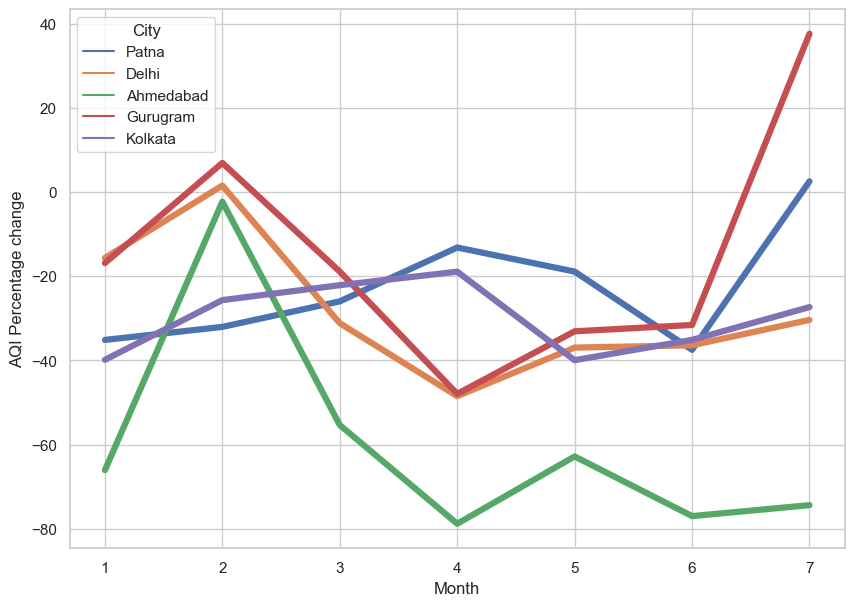

In [47]:
#creating a list of some of the most polluted cities
most_polluted=['Delhi','Patna','Ahmedabad','Gurugram','Kolkata']

#forming two df's- containing data from 2019 and 2020 respectively
cities_2019= df_city[(df_city['City'].isin(most_polluted)) & (df_city['Year']==2019)]
cities_2020= df_city[(df_city['City'].isin(most_polluted)) & (df_city['Year']==2020)]

cities_19_vs_20 = pd.merge(cities_2019, cities_2020, how="inner", on=["City", "Month"])

#computing the percentage change in AQI
cities_19_vs_20['AQI Percentage change']=100*(cities_19_vs_20['AQI_y']-cities_19_vs_20['AQI_x'])/cities_19_vs_20['AQI_x']

#plotting AQI change for a few highly polluted cities
fig = plt.figure(figsize=(10,7))
sns.lineplot(
    data=cities_19_vs_20,
    x="Month", y="AQI Percentage change",hue='City',linewidth=4.5,
    markers=True, dashes=False
)

The overall pattern indicates a noticeable decline in the Air Quality Index (AQI) during the period of lockdown, indicating significant advancements in air quality due to decreased pollution levels.

In [48]:
# Exporting Visualization
fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'AQI trend for the period (2019-2020).png'))

# Cities which had underwent the most drastic improvement in Air Quality:

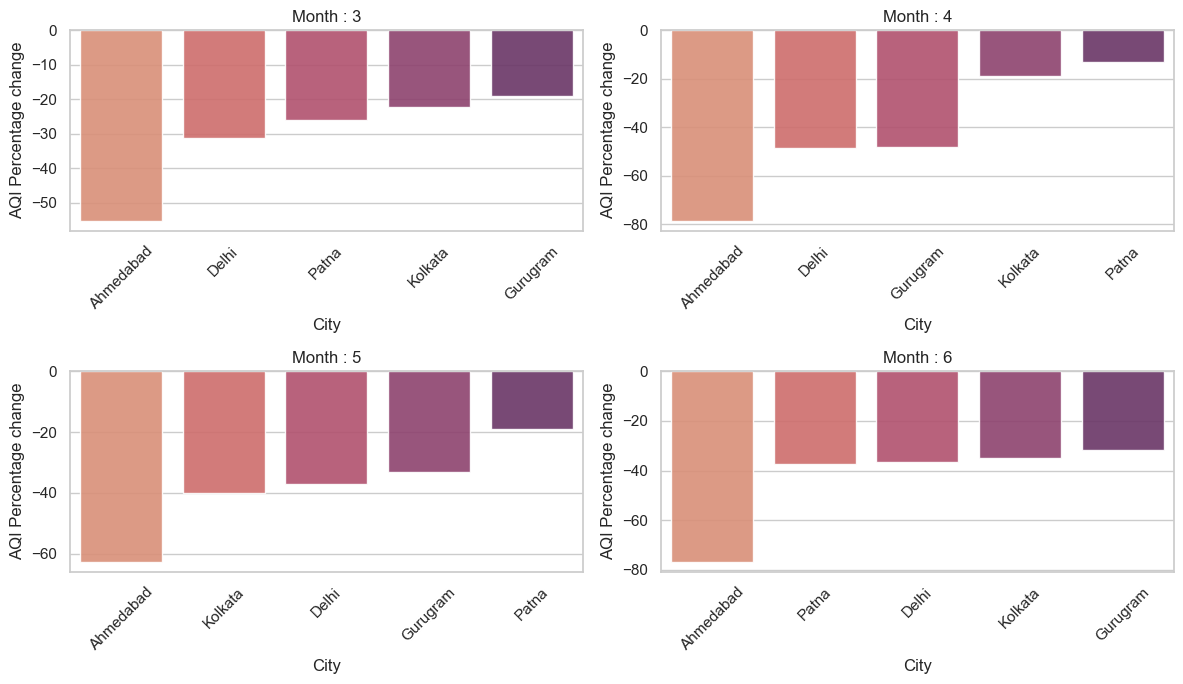

In [49]:
#forming two seperate dataframes for years 2019 and 2020
cities_19_all= cities_2019[cities_2019['Year']==2019]
cities_20_all= cities_2020[cities_2020['Year']==2020]

#joining the two df's to get a comparitive view of AQI value in 2019 and 2020
cities_19_vs_20_all = pd.merge(cities_19_all, cities_20_all, how="inner", on=["City", "Month"])
cities_19_vs_20_all['AQI Percentage change']=100*(cities_19_vs_20_all['AQI_y']-cities_19_vs_20_all['AQI_x'])/cities_19_vs_20_all['AQI_x']

#lockdown months- which we will be analysing
months=[3,4,5,6]
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(12, 7))

#plotting the top 10 cities for the months March-June 2020 which had the most improvement in AQI
for i, ax in zip(months, axes.flat):
    cities_AQI_comp=cities_19_vs_20_all[(cities_19_vs_20_all['AQI_y']!= 0.000000) & (cities_19_vs_20_all['Month']==i)]
    cities_AQI_comp_10=cities_AQI_comp[['City','Month','AQI_x','AQI_y','AQI Percentage change']].sort_values(by='AQI Percentage change', ascending=True).iloc[:10,:]
    
    h=sns.barplot(data=cities_AQI_comp_10, x="City", y='AQI Percentage change', palette="flare", alpha=.9, ax=ax)
    h.set(title='Month : {}'.format(i))
    h.set_xticklabels(h.get_xticklabels(), rotation=45)
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# We can see that there has been a significant improvement in the air quality for these cities over the four months.

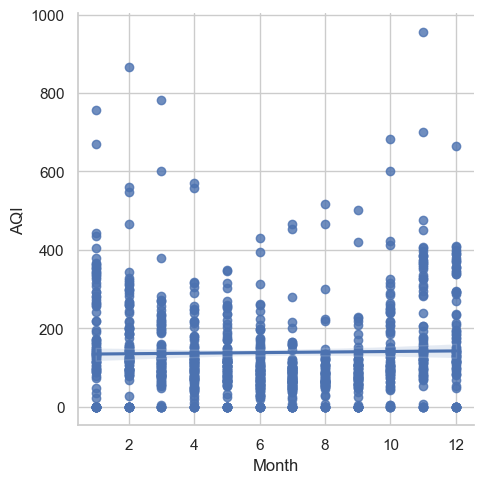

In [50]:
# Create a scatterplot for the "Month" and "AQI" columns in seaborn
Scatterplot=sns.lmplot(x = 'Month', y = 'AQI', data = df_city)

# In the scatterplot, we can see that while there is, indeed, a weak negative relationship, the trend line isn’t very steep, and there are many points far away from this line. The more the data points cluster near that line, the better fit the line will be.

In [51]:
# Exporting Visualization
Scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatter AQI vs Month.png'))

# c. Pairplot

In [52]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['PM', 'Nitric', 'CO','NH3', 'O3','SO2', 'AQI']]

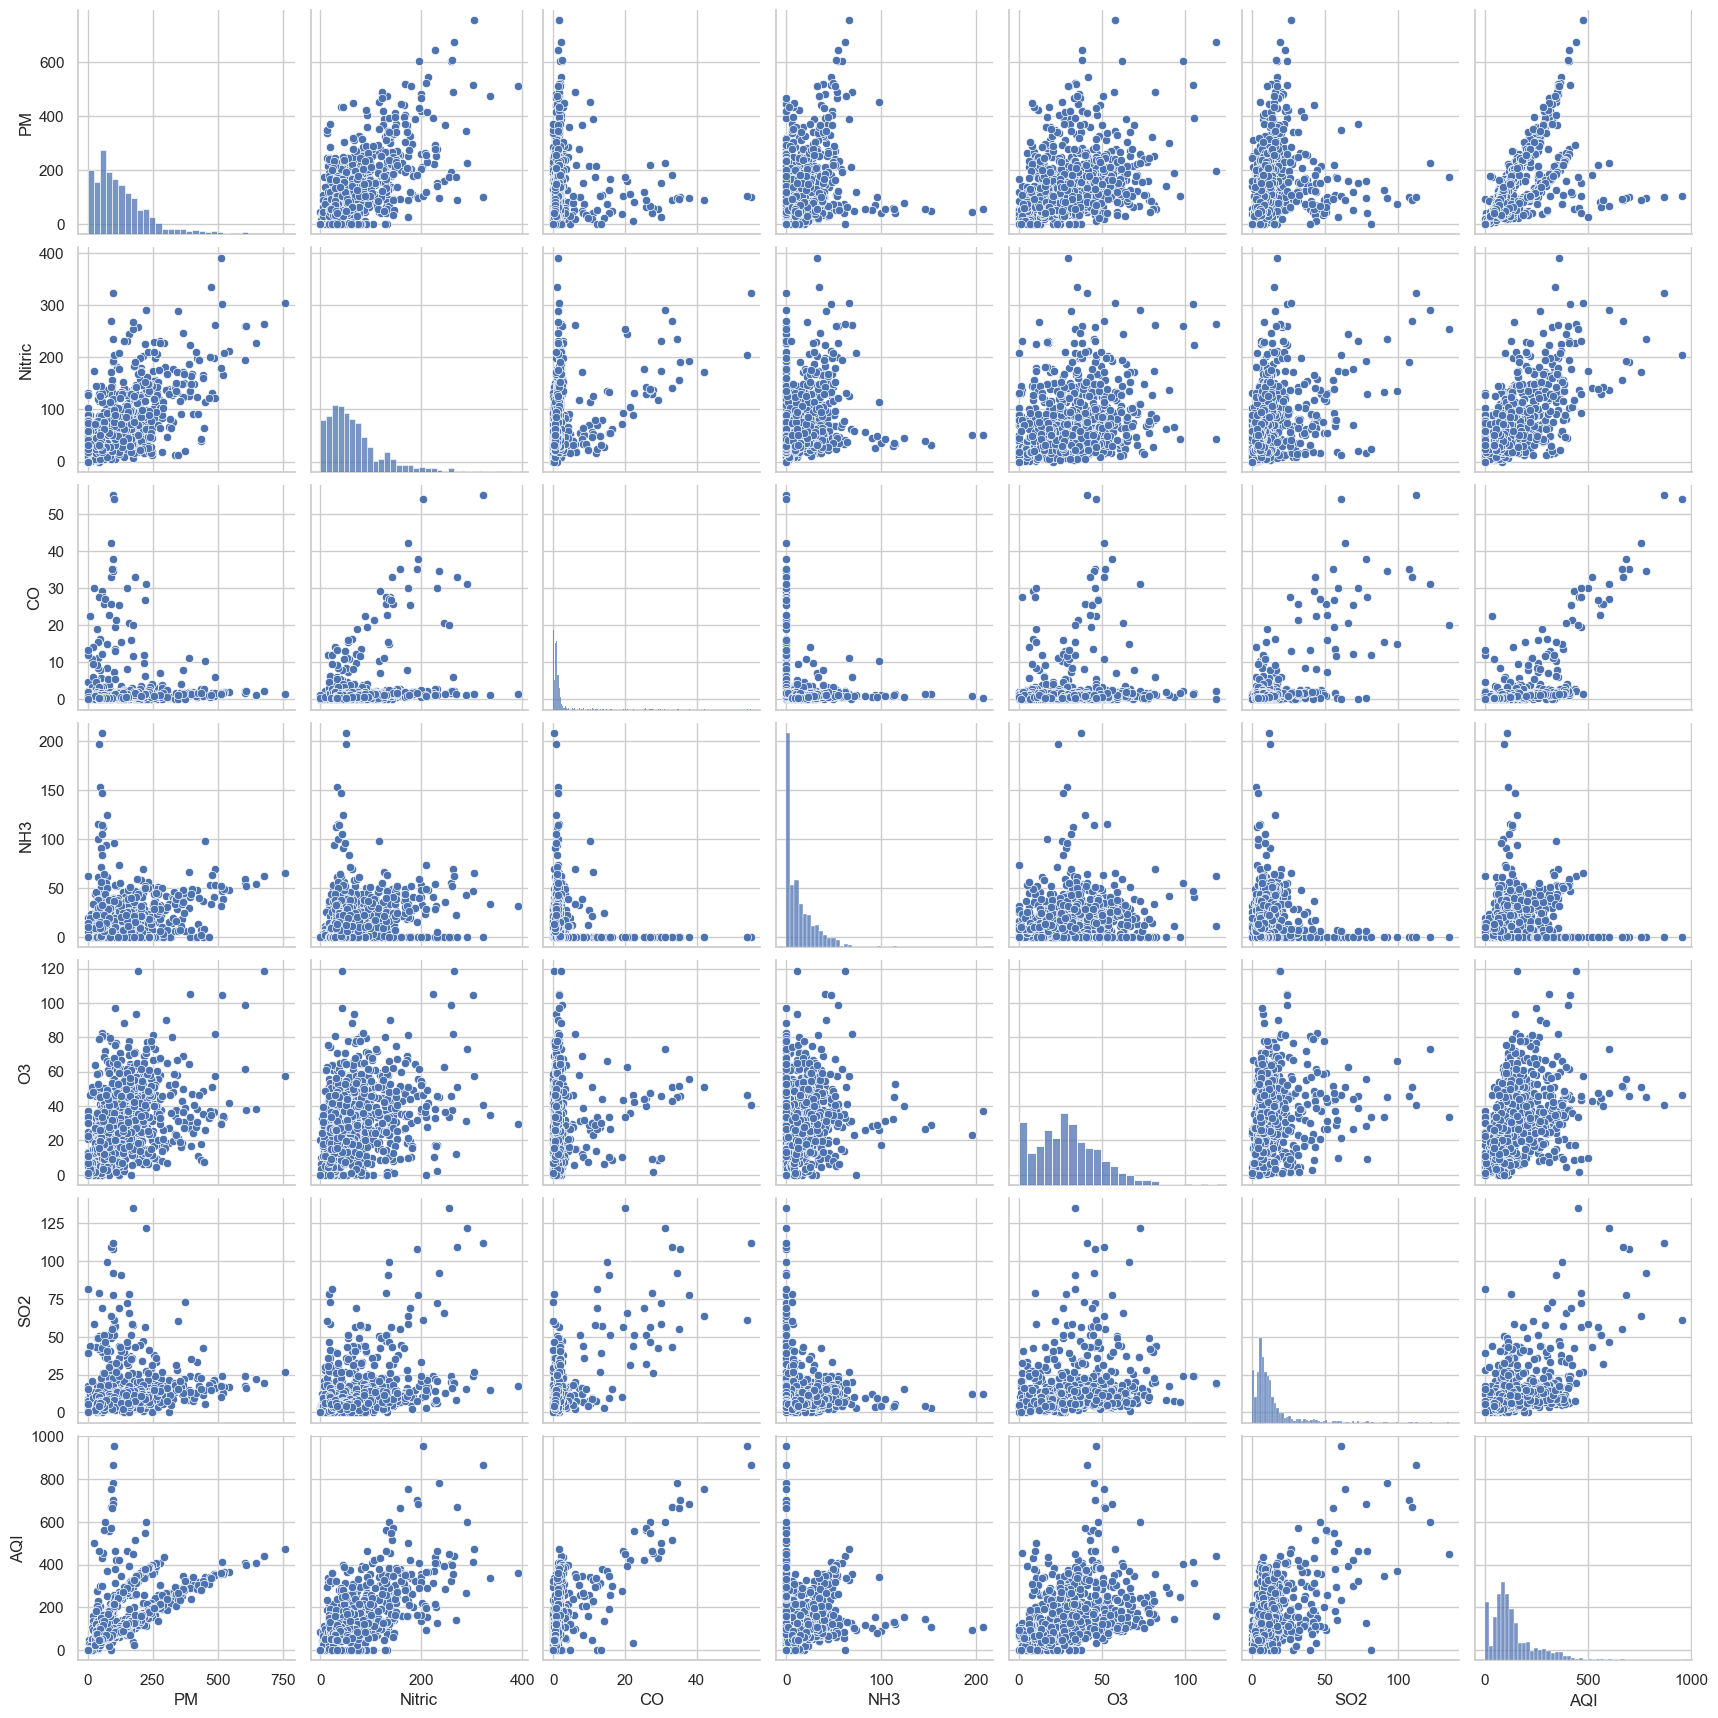

In [53]:
# Create a pair plot 
g = sns.pairplot(sub_2)

# The scatterplots show that there’s, perhaps, a closer relationship between AQI and other major Pollutant that include PM, Nitric, NH3, O3 and SO2.

In [54]:
# Exporting Visualization
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pairplot.png'))

<Axes: xlabel='AQI', ylabel='Count'>

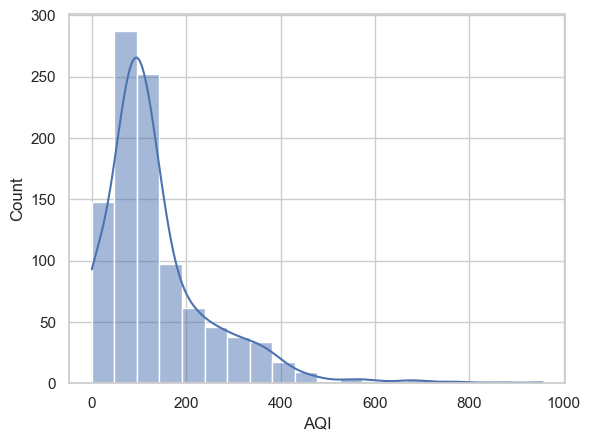

In [55]:
# Use a histogram to visualize the distribution of the variables.
# The argument "kde" add a line that encompasses the distribution
sns.histplot(df_city['AQI'], bins = 20, kde = True)

# The AQI is divided into six categories. Each category corresponds to a different level of health concern. Each category also has a specific color. The color makes it easy for people to quickly determine whether air quality is reaching unhealthy levels in their communities.
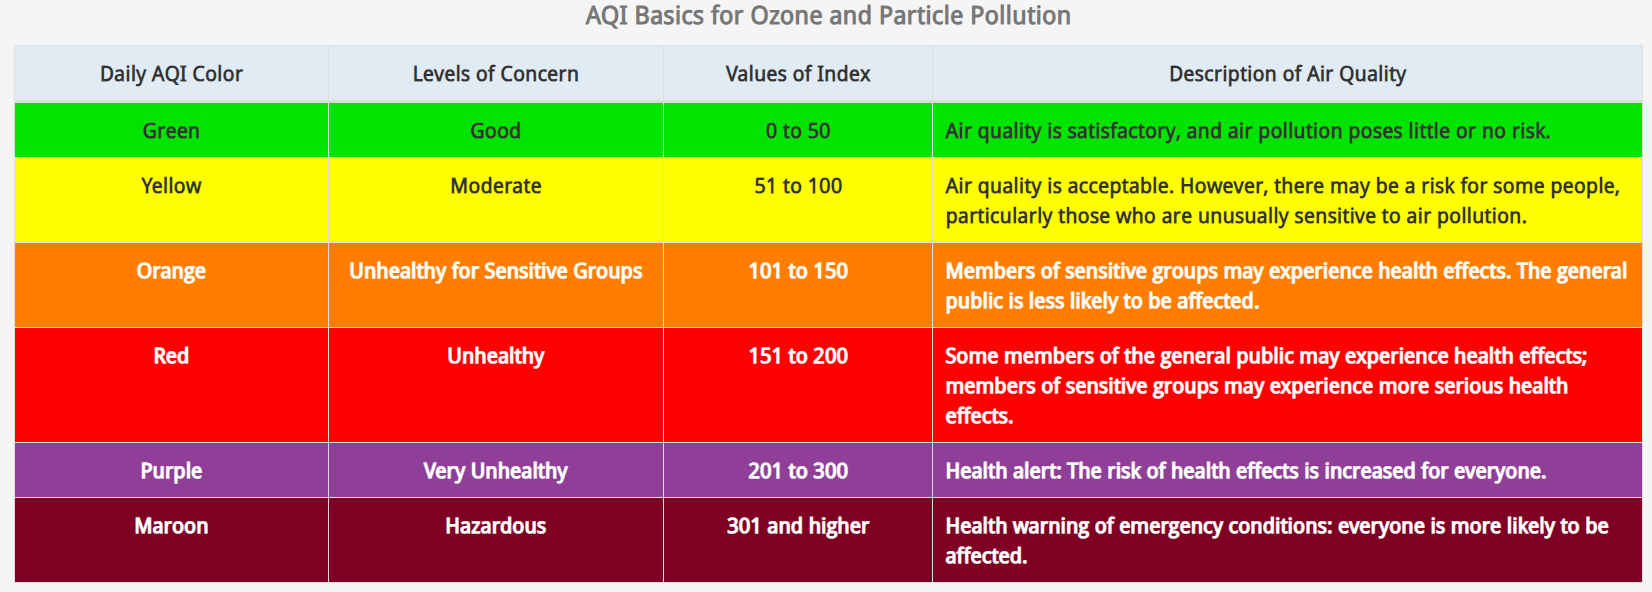

Therefore, we can categorize AQI value as per above table. (Source:https://www.airnow.gov/aqi/aqi-basics/)

In [56]:
df_city.loc[(df_city['AQI'] == 0) & (df_city['AQI'] >50), 'Level_of_Concern'] = 'Good'

In [57]:
df_city.loc[(df_city['AQI'] >= 51) & (df_city['AQI'] > 100), 'Level_of_Concern'] = 'Moderate'

In [58]:
df_city.loc[(df_city['AQI'] >= 101) & (df_city['AQI'] > 150), 'Level_of_Concern'] = 'Unhealthy for sensitive'

In [59]:
df_city.loc[(df_city['AQI'] >= 151) & (df_city['AQI'] > 200), 'Level_of_Concern'] = 'Unhealthy'

In [60]:
df_city.loc[(df_city['AQI'] >= 201) & (df_city['AQI'] > 300), 'Level_of_Concern'] = 'Very Unhealthy'

In [61]:
df_city.loc[(df_city['AQI'] <= 300), 'Level_of_Concern'] = 'Hazardous'

In [62]:
df_city['Level_of_Concern'].value_counts(dropna = False)

Hazardous         906
Very Unhealthy     99
Name: Level_of_Concern, dtype: int64

In [63]:
df_city.columns

Index(['State', 'City', 'Year', 'Month', 'PM', 'Nitric', 'CO', 'NH3', 'O3',
       'SO2', 'BTX', 'AQI', 'Level_of_Concern'],
      dtype='object')

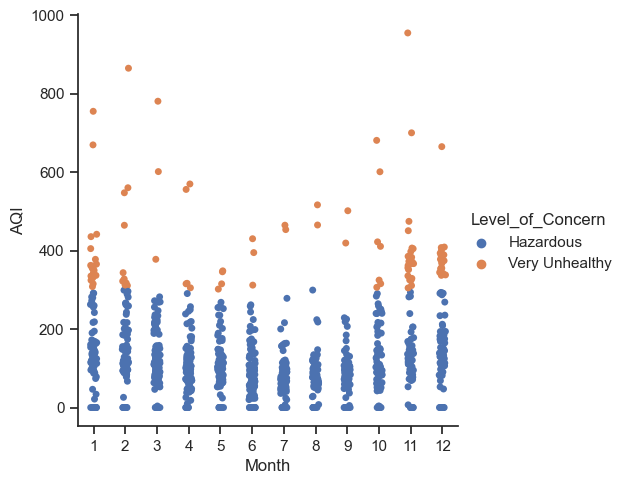

In [64]:
# Create a categorical plot in seaborn using the Level_of_Concern created above
sns.set(style="ticks")
g = sns.catplot(x="Month", y="AQI", hue="Level_of_Concern", data=df_city)

In [65]:
# Exporting Visualization
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Catplot Month & AQI.png'))

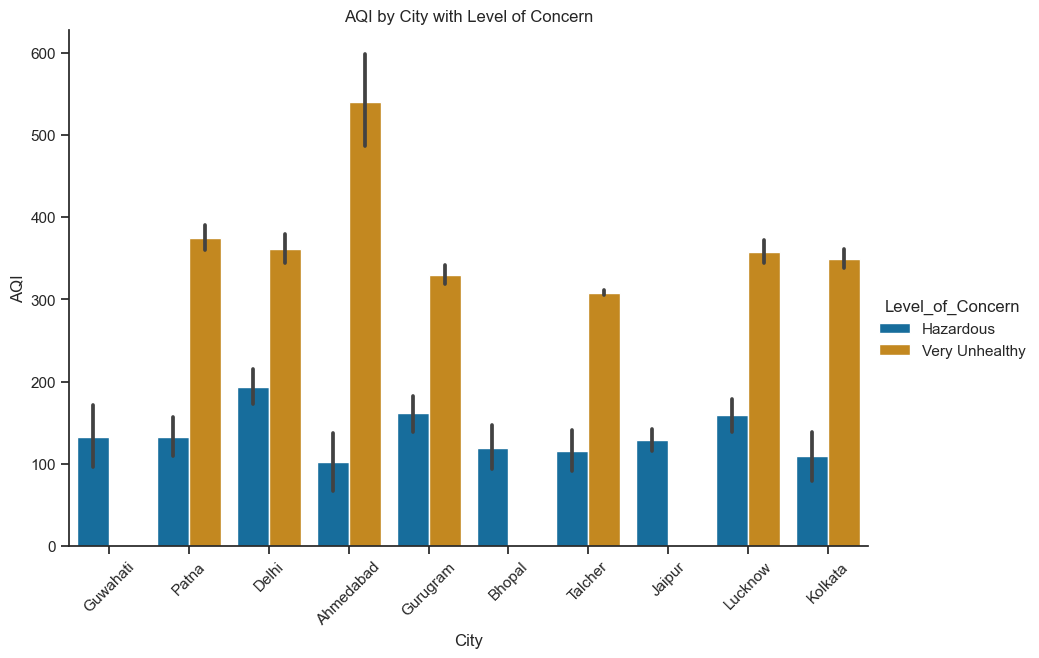

In [66]:
#catplot of 'df_city' with columns: "City", "AQI", "Level_of_Concern"

# Extract the top 10 cities based on AQI values
top_10_cities = df_city.groupby('City')['AQI'].mean().nlargest(10).index

# Filter the DataFrame for the top 10 cities
df_top_10_cities = df_city[df_city['City'].isin(top_10_cities)]

# Set the Seaborn style
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(x="City", y="AQI", hue="Level_of_Concern", data=df_top_10_cities, kind="bar", height=6, aspect=1.5, palette="colorblind")

# Set labels and title
g.set(xlabel="City", ylabel="AQI")
plt.title("AQI by City with Level of Concern")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [67]:
# Exporting Visualization
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Catplot 10 Most Polluted City & AQI.png'))

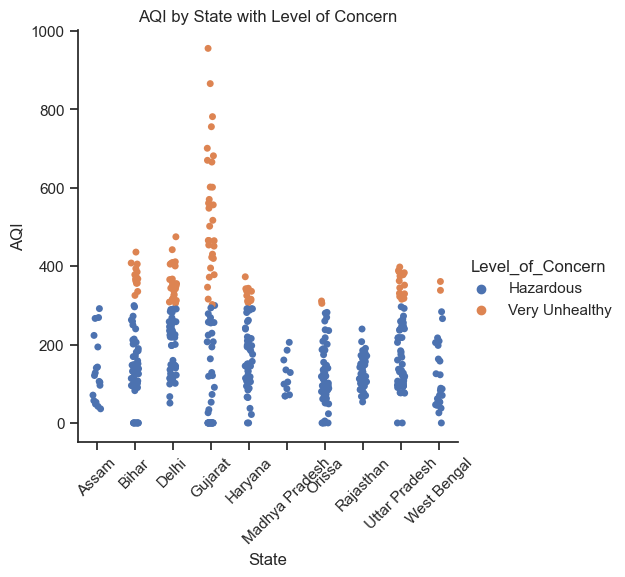

In [68]:
# Catplot 10 Most Polluted State

# Extract the top 10 states based on AQI values
top_10_states = df_city.groupby('State')['AQI'].mean().nlargest(10).index

# Filter the DataFrame for the top 10 cities
df_top_10_states = df_city[df_city['State'].isin(top_10_states)]

# Set the Seaborn style
sns.set(style="ticks")

# Create the line plot
g = sns.catplot(x="State", y="AQI", hue="Level_of_Concern", data=df_top_10_states)

# Set labels and title
g.set(xlabel="State", ylabel="AQI")
plt.title("AQI by State with Level of Concern")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [69]:
# Exporting Visualization
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Catplot 10 Most Polluted States & AQI.png'))

# 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

1. What is the overall trend of air quality over a specific time period? 

--The overall trend indicates a significant decrease in AQI during the lockdown months i.e March till June in 2020, indicating a substantial improvement in air quality and reduced pollution levels.

2. Are there any seasonal patterns in air quality? Does air quality vary throughout the year?

-- AQI level shows an upward trend starting from monsoon and starts to peak during Winters and continues as long up to February.

3. Which pollutants contribute most significantly to poor air quality in a particular region?

-- The major Pollutant that contribute poor/hazardous AQI are PM, Nitric, NH3, O3 and SO2.

4. Are there any geographical patterns in air quality? Are certain areas consistently experiencing better or worse air quality?

-- Gujrat, Delhi, Bihar, Uttar-Pradesh and Haryana are top 5 most polluted states in India.

5. Are there any significant changes in air quality over the years? Has air quality improved or worsened?

-- After Comparing historical data for the the period 2017 till 2020, the only period when air quality improved was during lockdown in 2020.

7. How does air quality compare across different cities or regions within a country? 

-- No pattern found, hence dropping this from future analysis.

# 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

Hypothesis 1: 

If the burning of fossil fuels, high energy consumption and industrial emissions increase during winter, then air pollution levels and poor AQI will rise.

Hypothesis 2:

If PM, Nitric, NH3, O3, and SO2 are the major pollutants, then their presence in the air will contribute to poor/hazardous AQI levels.

Hypothesis 3: 

If certain weather conditions (temperature, humidity, wind speed) are favorable, then there will be a positive correlation with improved air quality.


In [70]:
# Exporting final data set as pkl. format
df_city.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_city_final.pkl'))

In [71]:
# Exporting final data set as pkl. format
df_stations.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_states_final.pkl'))